# Collaboration and Competition

---

Train a pair of agents to play the longest tennis game they can possibly do!

<table style="margin: auto;">
  <tr>
      <td>Trained Agent</td>
  </tr>
  <tr>
    <td><img src="files/images/trained_tennis.gif" align="center"></td>
  </tr>
</table>

---

## Table of Contents
---
* Table of Contents


0. [Import Necessary Modules](#0.-Import-Necessary-Modules)
1. [Start and Explore the Environment](#1.-Start-and-Explore-the-Environment)
    * 1.1. [Start the Environment](#1.1.-Start-the-Environment)
    * 1.2. [Examine the State and Action Spaces](#1.2.-Examine-the-State-and-Action-Spaces)
    * 1.3. [Take Random Actions in the Environment](#1.3.-Take-Random-Actions-in-the-Environment)
2. [It's Your Turn!](#2.-It's-Your-Turn!)
    * 1.1. [Tune Your Hyperparameters!](#2.1.-Tune-Your-Hyperparameters!)
    * 1.2. [Instantiate Your Agent](#2.2.-Instantiate-Your-Agent)
    * 1.3. [Train Your Agent](#2.3.-Train-Your-Agent)
    * 1.4. [Plot the Training Scores](#2.4.-Plot-the-Training-Scores)
    * 1.5. [Save the Agent](#2.5.-Save-the-Agent)
3. [Load & Evaluate the Agent](#3.-Load-&-Evaluate-Your/Pretrained-Agent)
    * 1.1. [Load the Agent](#3.1.-Load-the-Agent)
    * 1.2. [Watch the Agent!](#3.2.-Watch-the-Agent!)
    * 1.3. [More Accurate Evaluation](#3.3.-More-Accurate-Evaluation)
4. [Finishing Up](#4.-Finishing-Up)


* [Thank You!](##-Thank-you!)

---

## [0.](#Table-of-Contents) Import Necessary Modules
---
Just run the next cell to prepare all the modules needed.

In [1]:
# DO NOT CHANGE THE CODE HERE
import random
from collections import deque

import matplotlib.pyplot as plt
%matplotlib inline

from unityagents import UnityEnvironment
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from ddpg_agent import Agent
from train import ddpg

random.seed(0)
np.random.seed(0)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.empty(1, device=device);

---

## [1.](#Table-of-Contents) Start and Explore the Environment
---
In this section, you will load the environment and explore it with random actions. Exploration is optional, but loading the environment is necessary.

### [1.1.](#Table-of-Contents) Start the Environment
---
Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(
    file_name="Tennis_Windows_x86_64/Tennis.exe",    # <--- File Path to the Environment file
    seed=0
)

# DO NOT EDIT THE LINES BELOW
brain_name = env.brain_names[0]
env_info = env.reset(train_mode=False)[brain_name]
num_agents = len(env_info.agents)
action_size = env.brains[brain_name].vector_action_space_size
state_size = env_info.vector_observations.shape[1]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


### [1.2.](#Table-of-Contents) Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables for each racket and the ball, corresponding to the position and velocity of each object. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [3]:
# number of agents
print('Number of agents:', num_agents, end='\n\n')

# size of each action
print('Size of each action:', action_size, end='\n\n')

# examine the state space
states = env_info.vector_observations
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:\n', states[0], end='\n\n')
print('\nShapes:')
print("rewards", len(env_info.rewards))
print("vector_observations", env_info.vector_observations.shape)
print("local_done", len(env_info.local_done))

Number of agents: 2

Size of each action: 2

There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like:
 [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


Shapes:
rewards 2
vector_observations (2, 24)
local_done 2


### [1.3.](#Table-of-Contents) Take Random Actions in the Environment
---
In the next code cell, you will watch the agents' performance when they select actions at random with each time step. You should be able to observe the agents on the window as they perform actions in the environment.

In [4]:
for i in range(3):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    step_count = 0
    while True:
        step_count += 1
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {} ({} time steps): {}'.format(i+1, step_count, np.max(scores)))

Score (max over agents) from episode 1 (16 time steps): 0.0
Score (max over agents) from episode 2 (16 time steps): 0.0
Score (max over agents) from episode 3 (14 time steps): 0.0


---

### [2.](#Table-of-Contents) It's Your Turn!
---
Here, you can train your own tennis agent to solve the environment!

### [2.1.](#Table-of-Contents) Tune Your Hyperparameters!
---
All necessary hyperparameters and training parameters for the agent are provided below. Try fiddling with the values to get a better performance out of it!

In [5]:
hyperparams = {
    # Reproducibility
    'seed'                : 0,        # random seed for reproducible results
    
    # Agent basic parameters
    'batch_size'          : 1024,     # batch size for each learning step
    'buffer_size'         : int(1e6), # up to how many recent experiences to keep
    'start_since'         : 1024,     # how many experiences to collect before starting learning
    'gamma'               : 0.95,     # discount factor
    'update_every'        : 1,        # update step frequency
    'n_updates'           : 1,        # number of updates per update step
    'tau'                 : 0.2,      # soft-update parameter [0, 1]
    
    'actor_lr'            : 1e-3,     # learning rate for the actor network
    'critic_lr'           : 1e-3,     # learning rate for the critic network
    'clip'                : None,     # gradient clipping to prevent gradient spikes
    'weight_decay'        : 0,        # weight decay for the *critic* network

    'distributional'      : True,     # whether to use distributional learning

    # Prioritized Experience Replay Parameters
    'priority_eps'        : 1e-3,     # base priority in order to ensure nonzero priorities
    'a'                   : 0.,       # priority exponent parameter [0, 1]

    # n-step Bootstrap Target parameter
    'n_multisteps'        : 1,        # number of steps to bootstrap

    # Distributional Learning parameters
    'v_min'               : -0.1,     # minimum value for support
    'v_max'               : 0.1,      # maximum value for support
    'n_atoms'             : 51,       # number of atoms for distribution

    # Noisy Layer parameters
    'initial_sigma'       : 0.500,    # initial noisy parameter value
    'linear_type'         : 'noisy',  # either 'linear' or 'noisy'
    'factorized'          : True      # whether to use factorized gaussian noise or not(independent gaussian noise)
}

### -------------------------------------------------------------------------------------------------------------- ###

train_params = {
    'n_episodes'           : 250,     # number of total episodes to train
    'continue_after_solved': True,    # whether to keep training even after the environment is solved
    
    # Exploration using gaussian noise
    'eps_start'            : 0.,      # initial epsilon value
    'eps_min'              : 0.,      # minimum value for epsilon
    'eps_decay'            : 0.,      # epsilon decay rate

    # Importance-Sampling Weight parameter for Prioritized Experience Replay
    'beta_start'           : 0.,      # starting value 
    'beta_end'             : 0.       # end value
}

### [2.2.](#Table-of-Contents) Instantiate Your Agent
---
After tuning your hyperparameters, the agent instance must be created.

To do so, simply run the cell below!

In [6]:
agent = Agent(state_size, action_size, num_agents, **hyperparams)

print(agent.actor_local)
print()
print(agent.critic_local)

Actor(
  (bn0): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc0): Linear(in_features=24, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): NoisyLinear(in_features=128, out_features=64, bias=True, initial_sigma=0.5, factorized=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): NoisyLinear(in_features=64, out_features=2, bias=True, initial_sigma=0.5, factorized=True)
  (hidden_activation): ReLU()
  (output_activation): Tanh()
)

Critic(
  (bn): BatchNorm1d(24, eps=1e-05, momentum=0.02, affine=True, track_running_stats=True)
  (fcs0): Linear(in_features=24, out_features=256, bias=True)
  (fc1): Linear(in_features=258, out_features=128, bias=True)
  (fc2): NoisyLinear(in_fe

### [2.3.](#Table-of-Contents) Train Your Agent
---
With your agent and training settings, the next cell will run the training session for your agent!

(This may take a while!)

In [7]:
scores = ddpg(env, agent, **train_params)

Episode 10 | Total Steps (all agents): 376 | Current Max Score:  0.000 | Last 100 Average Max Score:  0.019 | Epsilon: 0.0000 | A: 0.0000 | Beta: 0.0000 | Avg Actor Noise Magnitude: 0.0445 +- 0.0023 | Actor Action Std: 0.1057 | Avg Critic Noise Magnitude: 0.0494 +- 0.0083*** timestep 14 ***
Episode 20 | Total Steps (all agents): 716 | Current Max Score:  0.000 | Last 100 Average Max Score:  0.015 | Epsilon: 0.0000 | A: 0.0000 | Beta: 0.0000 | Avg Actor Noise Magnitude: 0.0445 +- 0.0023 | Actor Action Std: 0.0677 | Avg Critic Noise Magnitude: 0.0494 +- 0.0083 *** timestep 14 ***
Episode 28 | Total Steps (all agents): 1018 | Current Max Score:  0.000 | Last 100 Average Max Score:  0.014 | Epsilon: 0.0000 | A: 0.0000 | Beta: 0.0000 | Avg Actor Noise Magnitude: 0.0445 +- 0.0023 | Actor Action Std: 0.1547 | Avg Critic Noise Magnitude: 0.0494 +- 0.0083 *** timestep 2 ***

c:\users\0107w\anaconda3\envs\drlnd\lib\site-packages\torch\nn\_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Episode 30 | Total Steps (all agents): 1110 | Current Max Score:  0.000 | Last 100 Average Max Score:  0.016 | Epsilon: 0.0000 | A: 0.0000 | Beta: 0.0000 | Avg Actor Noise Magnitude: 0.0445 +- 0.0046 | Actor Action Std: 0.1010 | Avg Critic Noise Magnitude: 0.0477 +- 0.0087 *** timestep 14 ***
Episode 40 | Total Steps (all agents): 1396 | Current Max Score:  0.000 | Last 100 Average Max Score:  0.012 | Epsilon: 0.0000 | A: 0.0000 | Beta: 0.0000 | Avg Actor Noise Magnitude: 0.0442 +- 0.0088 | Actor Action Std: 0.0455 | Avg Critic Noise Magnitude: 0.0443 +- 0.0122 *** timestep 14 ***
Episode 50 | Total Steps (all agents): 1680 | Current Max Score:  0.000 | Last 100 Average Max Score:  0.010 | Epsilon: 0.0000 | A: 0.0000 | Beta: 0.0000 | Avg Actor Noise Magnitude: 0.0433 +- 0.0096 | Actor Action Std: 0.0279 | Avg Critic Noise Magnitude: 0.0423 +- 0.0147 *** timestep 14 ***
Episode 60 | Total Steps (all agents): 1964 | Current Max Score:  0.000 | Last 100 Average Max Score:  0.008 | Epsilon

### [2.4.](#Table-of-Contents) Plot the Training Scores
---
The code cell below will plot the scores your agent received during its training.

This allows you to see your agent's learning performance at a glance!

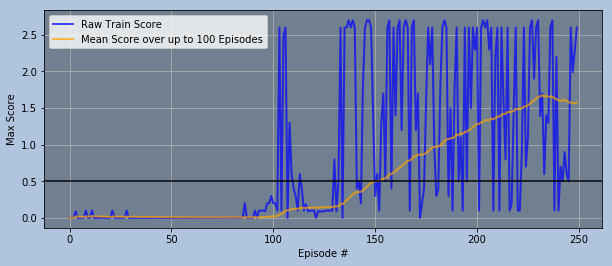

In [8]:
fig = plt.figure(figsize=(10, 4), facecolor='lightsteelblue')
ax = fig.add_subplot(111)
ax.grid(True)
ax.set_facecolor('slategray')
ax.plot(np.arange(len(scores)), scores,
        alpha=0.7, linewidth=2, color="blue", label="Raw Train Score")
ax.plot(np.arange(len(scores)), np.array([np.mean(scores[max(0,i-100):i]) for i in range(1, len(scores)+1)]),
        alpha=0.7, linewidth=2, color="orange", label="Mean Score over up to 100 Episodes")
ax.legend()
xlim = ax.get_xlim()
ax.plot(xlim, (0.5, 0.5), color="black")
ax.set_xlim(*xlim)
ax.set_ylabel('Max Score')
ax.set_xlabel('Episode #');

### [2.5.](#Table-of-Contents) Save the Agent
---
If you are satisfied with your agent, you would want to save the agent, scores, and your hyperparameter settings so that it won't be lost.

**_Before running the cell below_**, change the file name parameter `f` to the file name you want.

In [10]:
torch.save(

    f='pretrained.pth',    # <--- Name of the save

    obj={'hyperparams': hyperparams, 'train_params': train_params,
         'train_scores': scores,
         'actor_dict': agent.actor_local.state_dict(),
         'critic_dict': agent.critic_local.state_dict()}
)

---

## [3.](#Table-of-Contents) Load & Evaluate Your/Pretrained Agent
---
Once the training is done and you want to test your agent, or if you want to see how well my agent performs, you can load the model and run it in this section.

### [3.1.](#Table-of-Contents) Load the Agent
---
First, you need to load the agent you wish to run, unless the agent is already up and running.

**_Before running the next cell_**, change the file name parameter `f` in `torch.load()` to the name of the saved file you want to load.

In [11]:
saved = torch.load(

            f="pretrained.pth",    # <--- Name of the file to be loaded

            map_location=device

        )

agent = Agent(state_size, action_size, num_agents, **saved['hyperparams'])
agent.actor_local.load_state_dict(saved['actor_dict'], strict=False)
agent.critic_local.load_state_dict(saved['critic_dict'], strict=False);

### [3.2.](#Table-of-Contents) Watch the Agent!
---
Watch the trained agent performing the task!

In [12]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
t = 0                                                  # initialize the time step count
while True:
    actions = agent.act(states)                        # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    t += 1
    print("\rCurrent Max Score at timestep {}: {}".format(t, np.max(scores)), end='')
    if np.any(dones):                                  # exit loop if episode finished
        break
print("\nFinal Max Score: {}".format(np.max(scores)))

Current Max Score at timestep 1001: 2.6000000387430196
Final Max Score: 2.600000038743019


### [3.3.](#Table-of-Contents) More Accurate Evaluation
---
To get a better prediction for the agent's performance, you can run multiple episodes and get the average score.

Set `n_episodes` in the code cell below to the number of episodes you want to test for, and run the code!

In [13]:
n_episodes = 100    # <--- Number of Episodes to test the agent for



max_scores = []
report_str_format = "\rEpisode {} | Current Episode Max Score: {:.3f} | Previous Episode Max Score: {:.3f} | Overall Average Score: {:.3f}"
for i in range(n_episodes):
    env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = agent.act(states)                        # select an action (for each agent)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        print(report_str_format.format(i+1, np.max(scores), max_scores[-1] if max_scores else 0, np.mean(max_scores) if max_scores else 0), end='')
        if np.any(dones):                                  # exit loop if episode finished
            break
    if (i+1) % 10 == 0:
        print()
    max_scores.append(np.max(scores))
print("\nFinal Average Score: {}".format(np.mean(max_scores)))

Episode 10 | Current Episode Max Score: 0.000 | Previous Episode Max Score: 2.600 | Overall Average Score: 1.377
Episode 20 | Current Episode Max Score: 0.700 | Previous Episode Max Score: 0.100 | Overall Average Score: 1.073
Episode 30 | Current Episode Max Score: 0.100 | Previous Episode Max Score: 1.200 | Overall Average Score: 1.248
Episode 40 | Current Episode Max Score: 2.600 | Previous Episode Max Score: 0.200 | Overall Average Score: 1.258
Episode 50 | Current Episode Max Score: 1.100 | Previous Episode Max Score: 0.100 | Overall Average Score: 1.277
Episode 60 | Current Episode Max Score: 0.100 | Previous Episode Max Score: 2.700 | Overall Average Score: 1.296
Episode 70 | Current Episode Max Score: 0.100 | Previous Episode Max Score: 0.100 | Overall Average Score: 1.288
Episode 80 | Current Episode Max Score: 2.700 | Previous Episode Max Score: 2.600 | Overall Average Score: 1.278
Episode 90 | Current Episode Max Score: 0.100 | Previous Episode Max Score: 2.200 | Overall Aver

---

## [4.](#Table-of-Contents) Finishing Up
---
When you are done, run the cell below to close the environment.

In [14]:
env.close()

---

# [#](#Table-of-Contents) Thank you!
I hope you found something interesting in here. Happy Learning!